In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
env = GridworldEnv('1') # Number of task 

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


# Q-Learning with rollout

In [3]:
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

###### LEARNING #####
GAME 0

1.0
1.0
GAME 1

1.0
1.0
GAME 2

1.0
1.0
GAME 3

1.0
1.0
GAME 4

1.0
1.0
GAME 5

1.0
1.0
GAME 6

0.0
1.0
GAME 7

1.0
1.0
GAME 8

1.0
1.0
GAME 9

1.0
1.0
GAME 10

1.0
1.0
GAME 11

1.0
1.0
GAME 12

1.0
1.0
GAME 13

1.0
1.0
GAME 14

1.0
1.0
GAME 15

0.0
1.0
GAME 16

1.0
1.0
GAME 17

1.0
0.0
GAME 18

1.0
1.0
GAME 19

1.0
1.0
GAME 20

1.0
1.0
GAME 21

1.0
1.0
GAME 22

1.0
1.0
GAME 23

1.0
1.0
GAME 24

1.0
1.0
GAME 25

1.0
1.0
GAME 26

1.0
1.0
GAME 27

0.0
1.0
GAME 28

1.0
1.0
GAME 29

1.0
0.0
GAME 30

1.0
1.0
GAME 31

1.0
1.0
GAME 32

1.0
1.0
GAME 33

1.0
1.0
GAME 34

1.0
1.0
GAME 35

1.0
1.0
GAME 36

0.0
1.0
GAME 37

1.0
1.0
GAME 38

0.0
0.0
GAME 39

1.0
1.0
GAME 40

1.0
1.0
GAME 41

1.0
1.0
GAME 42

1.0
1.0
GAME 43

1.0
1.0
GAME 44

1.0
1.0
GAME 45

0.0
0.0
GAME 46

1.0
1.0
GAME 47

1.0
1.0
GAME 48

1.0
1.0
GAME 49

1.0
1.0
GAME 50

1.0
1.0
GAME 51

1.0
1.0
GAME 52

1.0
0.0
GAME 53

0.0
1.0
GAME 54

1.0
1.0
GAME 55

1.0
1.0
GAME 56

1.0
1.0
GAME 57

0.0
1.0
GA

IndexError: list index out of range

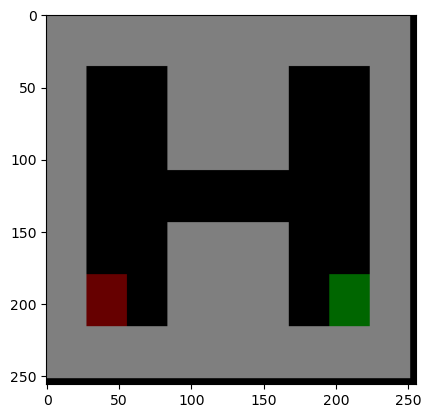

In [7]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.95 # reward discount
TAU=0.5
LEARNING_COUNT = 500
TEST_COUNT = 100
BETA=1/TAU

TURN_LIMIT = 1000
record=True
from algorithms.Q_Learning_rollout import Q_Learning_Rollout_Agents

env = GridworldEnv('1')
env.reset()
agents = Q_Learning_Rollout_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,10)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==300:
        epsilon = agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon,True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning/{h}.gif".format(h=j), writer="pillow")
    else:
        epsilon = agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon)
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


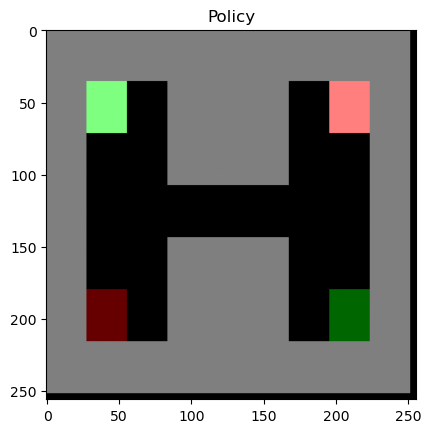

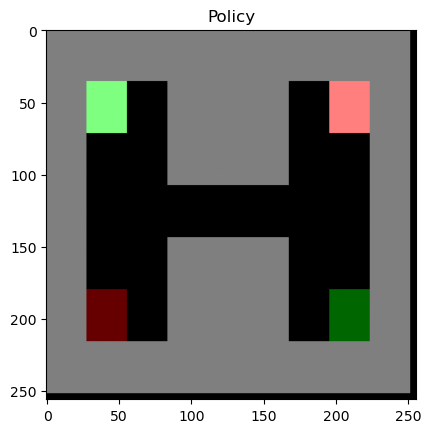

In [8]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[3,5,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

policy_function2 = np.argmax( Q_a2_mean , axis = 2)
print(Q_a2_mean[:,:,2])

def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# SOFT Q-LEARNING BASELINE

In [10]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.95 # reward discount
TAU=0.5
LEARNING_COUNT = 300
TEST_COUNT = 100
BETA=1/TAU

TURN_LIMIT = 1000
IS_MONITOR = True
from algorithms.Soft_Q_Learning_Baseline import Soft_Q_Learning_Baseline_Agents


env = GridworldEnv('1')
env.reset()
agents = Soft_Q_Learning_Baseline_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,TAU)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==250:
        total_reward,reward_1,reward_2=agents.learn(True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/soft_q_baseline/{h}.gif".format(h=j), writer="pillow")
    else:
        total_reward,reward_1,reward_2=agents.learn()
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

1.0
1.0
GAME 1

1.0
0.0
GAME 2

1.0
0.0
GAME 3

1.0
1.0
GAME 4

1.0
1.0
GAME 5

1.0
1.0
GAME 6

1.0
1.0
GAME 7

1.0
1.0
GAME 8

0.0
1.0
GAME 9

1.0
0.0
GAME 10

1.0
0.0
GAME 11

0.0
1.0
GAME 12

0.0
1.0
GAME 13

1.0
0.0
GAME 14

0.0
1.0
GAME 15

1.0
0.0
GAME 16

1.0
0.0
GAME 17

1.0
0.0
GAME 18

0.0
1.0
GAME 19

1.0
0.0
GAME 20

0.0
1.0
GAME 21

0.0
1.0
GAME 22

1.0
0.0
GAME 23

1.0
1.0
GAME 24

1.0
0.0
GAME 25

1.0
1.0
GAME 26

1.0
1.0
GAME 27

1.0
0.0
GAME 28

1.0
0.0
GAME 29

0.0
1.0
GAME 30

0.0
1.0
GAME 31

1.0
1.0
GAME 32

1.0
0.0
GAME 33

0.0
1.0
GAME 34

1.0
0.0
GAME 35

0.0
1.0
GAME 36

1.0
0.0
GAME 37

1.0
0.0
GAME 38

1.0
0.0
GAME 39

1.0
0.0
GAME 40

0.0
1.0
GAME 41

1.0
0.0
GAME 42

1.0
1.0
GAME 43

1.0
0.0
GAME 44

1.0
1.0
GAME 45

0.0
0.0
GAME 46

1.0
0.0
GAME 47

1.0
0.0
GAME 48

0.0
1.0
GAME 49

0.0
1.0
GAME 50

0.0
0.0
GAME 51

0.0
0.0
GAME 52

1.0
0.0
GAME 53

0.0
0.0
GAME 54

0.0
1.0
GAME 55

1.0
0.0
GAME 56

0.0
0.0
GAME 57

0.0
0.0
GA

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x11acd71a0> (for post_execute), with arguments args (),kwargs {}:


IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

In [ ]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,1,7,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[1,1,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

policy_function2 = np.argmax( Q_a2_mean , axis = 2)
print(Q_a2_mean[:,:,2])

def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

NameError: name 'agents' is not defined